In [0]:
#!unzip air-pollution-in-seoul.zip

In [120]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [122]:
# Retriving data for station code 104 for NO2
data_104=data[(data['Station code']==104) & (data['NO2']>0)]
print(len(data_104))
print(data_104.head(10))

25372
       Measurement date  Station code  ...  PM10  PM2.5
77714  2017-01-01 00:00           104  ...  73.0   46.0
77715  2017-01-01 01:00           104  ...  82.0   49.0
77716  2017-01-01 02:00           104  ...  72.0   41.0
77717  2017-01-01 03:00           104  ...  66.0   38.0
77718  2017-01-01 04:00           104  ...  52.0   39.0
77719  2017-01-01 05:00           104  ...  57.0   31.0
77720  2017-01-01 06:00           104  ...  56.0   35.0
77721  2017-01-01 07:00           104  ...  52.0   30.0
77722  2017-01-01 08:00           104  ...  48.0   33.0
77723  2017-01-01 09:00           104  ...  59.0   41.0

[10 rows x 11 columns]


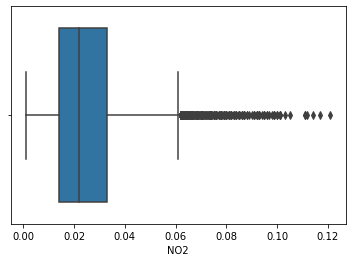

In [123]:
import seaborn as sns
sns.boxplot(data_104['NO2'])

25119


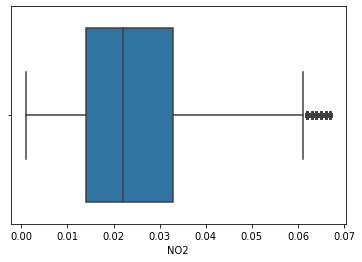

In [124]:
from scipy import stats
z = np.abs(stats.zscore(data_104['NO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_104_Rout = data_104[(z < 3)]
print(len(data_104_Rout))
sns.boxplot(data_104_Rout['NO2'])

In [125]:
df=data_104_Rout['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25119, 1)


In [126]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.067]
25119
0.0 1.0


In [127]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25114 [0.6666666666666666, 0.6515151515151516, 0.606060606060606, 0.6212121212121212, 0.48484848484848486]


In [128]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25114, 5)


,x1,x2,x3,x4,y
0,0.666667,0.651515,0.606061,0.621212,0.484848
1,0.651515,0.606061,0.621212,0.484848,0.560606
2,0.606061,0.621212,0.484848,0.560606,0.742424
3,0.621212,0.484848,0.560606,0.742424,0.530303
4,0.484848,0.560606,0.742424,0.530303,0.636364
5,0.560606,0.742424,0.530303,0.636364,0.621212
6,0.742424,0.530303,0.636364,0.621212,0.515152
7,0.530303,0.636364,0.621212,0.515152,0.530303
8,0.636364,0.621212,0.515152,0.530303,0.575758
9,0.621212,0.515152,0.530303,0.575758,0.606061


In [129]:
print(matrix[:,4])

[[0.48484848]
 [0.56060606]
 [0.74242424]
 ...
 [0.24242424]
 [0.28787879]
 [0.33333333]]


In [130]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8288, 1) [[0.20267578]
 [0.19967555]
 [0.6054026 ]
 [0.62282355]
 [0.39615889]]


In [131]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8492638783295838
[0.03429632]
[[ 0.02296685  0.0106176  -0.26455129  1.13250017]]


In [132]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.006329721361769688
absolute mean error :  0.05622818914928849
0.8402353795543291


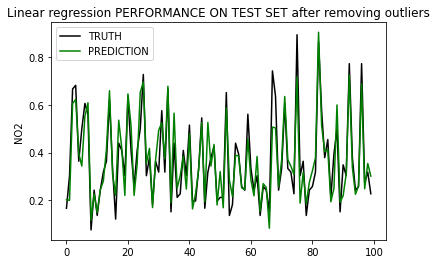

In [133]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('NO2')
plt.legend()
plt.show()

(25372, 1)
[0.001] [0.121]
25372
0.0 1.0
25367 [0.36666666666666664, 0.3583333333333334, 0.3333333333333333, 0.3416666666666667, 0.26666666666666666]
(8372, 1) [[0.05043746]
 [0.11246698]
 [0.28692607]
 [0.18515921]
 [0.16047021]]
mean squared eror :  0.0018904336025583153
absolute mean error :  0.031055224303180237
0.8634844181852687


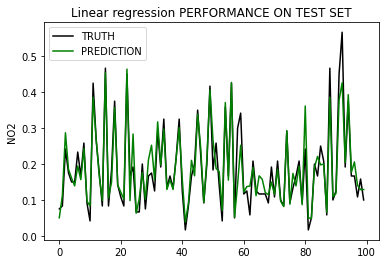

In [134]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_104['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [135]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0018904237519656534
absolute mean error :  0.031055534629751247
0.8634851295349752


In [136]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0018991966106180764
absolute mean error :  0.030993958792888944
0.862851607203647


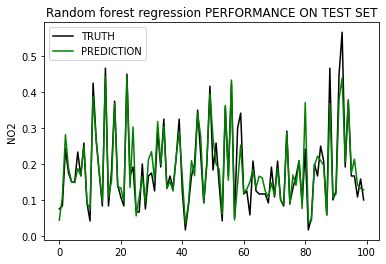

truth :  [[0.075     ]
 [0.08333333]
 [0.24166667]
 [0.175     ]
 [0.15      ]
 [0.15      ]
 [0.23333333]
 [0.16666667]
 [0.25833333]
 [0.09166667]]
prediction :  [0.04387964 0.10815983 0.28148544 0.18795154 0.15021964 0.14808715
 0.18678918 0.16868334 0.24945807 0.09170136]


In [137]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [138]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0018924904223251136
0.031143025124609446
0.8633358872097441


In [139]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0019053685988379293
absolute mean error :  0.03072197952641206
0.8624059038678373


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


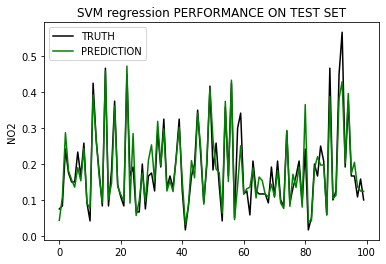

In [140]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [141]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16995/16995 [==============================] - 1s 69us/step - loss: 0.0024 - accuracy: 2.3536e-04
Epoch 2/100
16995/16995 [==============================] - 1s 65us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 3/100
16995/16995 [==============================] - 1s 64us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 4/100
16995/16995 [==============================] - 1s 63us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 5/100
16995/16995 [==============================] - 1s 66us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 6/100
16995/16995 [==============================] - 1s 64us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 7/100
16995/16995 [==============================] - 1s 64us/step - loss: 0.0019 - accuracy: 2.3536e-04
Epoch 8/100
16995/16995 [==============================] - 1s 64us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 9/100
16995/16995 [==============================] - 1s 64us/step - loss: 0.0020 - accuracy: 2.3536e-04
Epoch 10/1

dict_keys(['loss', 'accuracy'])


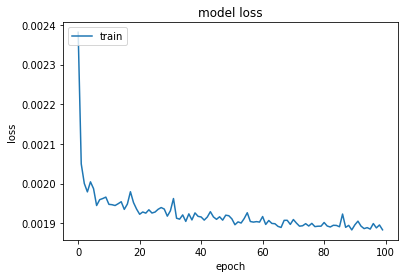

mean squared error :  0.0018828993737282438
mean absolute error :  0.03072197952641206
0.8624059038678373


In [142]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


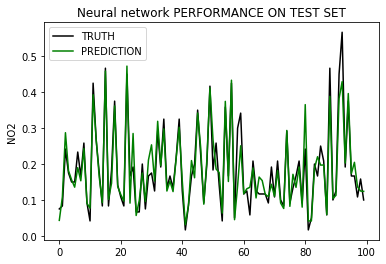

In [143]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [144]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.325      0.24166667 0.175      0.15      ]
 [0.325      0.31666667 0.30833333 0.3       ]
 [0.375      0.38333333 0.38333333 0.30833333]
 ...
 [0.15833333 0.08333333 0.05833333 0.06666667]
 [0.18333333 0.25833333 0.21666667 0.10833333]
 [0.15833333 0.125      0.13333333 0.175     ]]
(16995, 4)
(16995, 4, 1)


In [145]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16995/16995 [==============================] - 7s 440us/step - loss: 0.0068
Epoch 2/100
16995/16995 [==============================] - 6s 355us/step - loss: 0.0023
Epoch 3/100
16995/16995 [==============================] - 6s 352us/step - loss: 0.0020
Epoch 4/100
16995/16995 [==============================] - 6s 354us/step - loss: 0.0020
Epoch 5/100
16995/16995 [==============================] - 6s 353us/step - loss: 0.0020
Epoch 6/100
16995/16995 [==============================] - 6s 357us/step - loss: 0.0020
Epoch 7/100
16995/16995 [==============================] - 6s 352us/step - loss: 0.0020
Epoch 8/100
16995/16995 [==============================] - 6s 357us/step - loss: 0.0020
Epoch 9/100
16995/16995 [==============================] - 6s 356us/step - loss: 0.0020
Epoch 10/100
16995/16995 [==============================] - 6s 350us/step - loss: 0.0020
Epoch 11/100
16995/16995 [==============================] - 6s 351us/step - loss: 0.0020
Epoch 12/100
16995/16995 [====

dict_keys(['loss'])


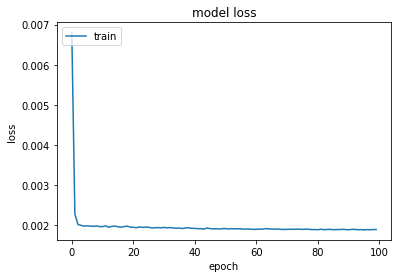

mean square error : 0.001878461151118275
mean absolute error :  0.030870100565350805
0.8643489955879734


In [146]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

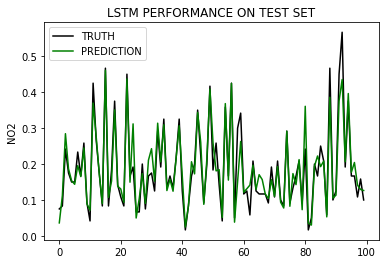

In [147]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')